<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 3), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 3), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 4), (67, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 3), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 2), (106, 1), (107, 3), (108, 1), (109, 1), (110, 1)

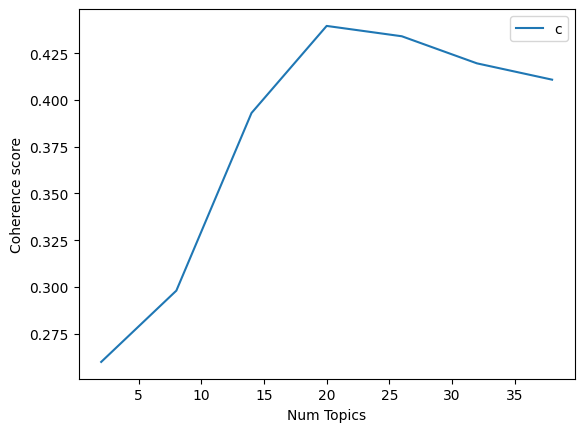

Model : 0
k-value : 2
Perplexity:  -6.473925797729213
Coherence Score:  0.25995213815409307
**********
Model : 1
k-value : 8
Perplexity:  -5.78837327399642
Coherence Score:  0.2980571746795729
**********
Model : 2
k-value : 14
Perplexity:  -5.480388985638115
Coherence Score:  0.39300936550804016
**********
Model : 3
k-value : 20
Perplexity:  -5.217917939407175
Coherence Score:  0.43955784116422114
**********
Model : 4
k-value : 26
Perplexity:  -5.080607861295692
Coherence Score:  0.43403220141009025
**********
Model : 5
k-value : 32
Perplexity:  -5.042717054611196
Coherence Score:  0.4195464573245905
**********
Model : 6
k-value : 38
Perplexity:  -4.983999709252467
Coherence Score:  0.4108268485219762
**********
(0, [('movi', 0.025619565), ('guardian', 0.014412705), ('film', 0.014412705), ('end', 0.012811726), ('marvel', 0.011210745), ('charact', 0.011210743), ('see', 0.009609765), ('way', 0.009609765), ('great', 0.009609765), ('feel', 0.008008785)])
(1, [('movi', 0.026763594), ('guard

In [ ]:
# Write your code here
!pip install bertopic
!pip install pyLDAvis
import pandas as pd
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from gensim.models import LsiModel
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import pandas as pd
df = pd.read_csv('movie_reviews_sentiment_Analysis.csv')
df = df.drop_duplicates(ignore_index=True)
stop_word = stopwords.words('english')
stop_word += ['com', 'ect', 'www', 'email', 'one', 'two', 'shall', 'will','muzo','edt','cds','sav','ong','vnbl','pll','dik','btu','shl','wiil','eet','mmjx','spfa','may','could','like','may','hou','edu','ees','also','let','get','much','give','make','want','know','http','would','take','need']
p = ['0','1','2','3','4','5','6','7','8','9']
def text_manipulation(text): #text cleaning
    text = text.lower() #text lowering
    tokenzie_text = word_tokenize(text)
    without_punt = [word for word in tokenzie_text if word not in string.punctuation] #removing puctuncations
    without_stop_w = [word for word in without_punt if word not in stop_word] # removing stop_words
    without_num = []
    for word in without_stop_w: #forloop for removing the digits
        if word.isdigit():
            continue
        if word.isalnum():
            word = list(word)
            words = [i for i in word if i not in p]
            word = ''.join(words)
            without_num.append(word)
        else:
            without_num.append(word)
    without_len1_2 = [word for word in without_num if len(word) >=3]
    return without_len1_2
df['Cleaned Review'] = df['Cleaned Review'].apply(text_manipulation)
vocubulary = list()
for word_list in df['Cleaned Review']: #for loop for getting the count of each words
   vocubulary.append(word_list)
vocubulary # features
id2word = corpora.Dictionary(list(vocubulary))

# Create Corpus
texts = vocubulary

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    c_v = []
    m_l = []
    for k in range(start, limit, step):
        model =gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics= k,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        m_l.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(coherencemodel.get_coherence())

    return m_l, c_v
m_l, c_v = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=vocubulary, start=2, limit=40, step=6)
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, c_v)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
i = 0
for k in range(start, limit, step):
  print("Model : "+str(i))
  print("k-value : "+str(k))
  print('Perplexity: ', m_l[i].log_perplexity(corpus))
  print('Coherence Score: ', c_v[i])
  print('*'*10)
  i+=1
model =gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= 10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
model_topics = model.show_topics(formatted=False)
for i in model_topics:
  print(i)


In [ ]:
vocubulary # features

[['guardian',
  'galaxi',
  'volum',
  'chaotic',
  'weird',
  'oftentim',
  'ridicul',
  'full',
  'heart',
  'emot',
  'great',
  'themesi',
  'must',
  'say',
  'best',
  'marvel',
  'movi',
  'sinc',
  'endgam',
  'necessarili',
  'hard',
  'though',
  'surpass',
  'way',
  'home',
  'amaz',
  'high',
  'moment',
  'lazi',
  'marvel',
  'desper',
  'hit',
  'theyv',
  'final',
  'got',
  'ithighlightseveri',
  'member',
  'crew',
  'got',
  'time',
  'shine',
  'rocket',
  'definit',
  'stood',
  'though',
  'see',
  'friend',
  'die',
  'wail',
  'pain',
  'grief',
  'made',
  'bawl',
  'high',
  'evolutionari',
  'mock',
  'man',
  'heavi',
  'stuff',
  'proce',
  'rip',
  'face',
  'friend',
  'shot',
  'well',
  'thu',
  'rocket',
  'traumat',
  'pastim',
  'revealedchukwudi',
  'iwuji',
  'fantast',
  'villain',
  'certain',
  'point',
  'downright',
  'terrifi',
  'realli',
  'line',
  'god',
  'took',
  'place',
  'convinc',
  'villainth',
  'moment',
  'starlord',
  'scream

The Guardians of the Galaxy (GCG) films have been the topic of several conversations, each focused on a different cluster of the series. The MCU film reception cluster focuses on cinematic qualities, character development, and general reception. The storyline and character growth cluster focuses on character development and the emotional impact on viewers. The emotional engagement and narrative cluster explores the emotional depth and storytelling qualities of films. The pleasure and entertainment value cluster focuses on memorable moments and sequences in films. The audience reaction and story development cluster addresses the progression of the tales. Appreciation for the franchise's direction and progress is also addressed. The comparative analysis and trilogy reception cluster compare the various entries in the series.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Read the dataset
data = pd.read_csv('/content/movie_reviews_sentiment_Analysis.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Cleaned Review'], data['Sentiment'], test_size=0.2, random_state=42)

# Initialize vectorizers
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

# Convert text data into feature vectors
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize classifiers
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier()

# Cross-validation
nb_cv_scores = cross_val_score(nb_classifier, X_train_count, y_train, cv=5)
rf_cv_scores = cross_val_score(rf_classifier, X_train_tfidf, y_train, cv=5)

# Train the classifiers
nb_classifier.fit(X_train_count, y_train)
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions
nb_pred_count = nb_classifier.predict(X_test_count)
rf_pred_tfidf = rf_classifier.predict(X_test_tfidf)

# Evaluation metrics
nb_accuracy_count = accuracy_score(y_test, nb_pred_count)
nb_precision_count = precision_score(y_test, nb_pred_count, average='weighted')
nb_recall_count = recall_score(y_test, nb_pred_count, average='weighted')
nb_f1_count = f1_score(y_test, nb_pred_count, average='weighted')

rf_accuracy_tfidf = accuracy_score(y_test, rf_pred_tfidf)
rf_precision_tfidf = precision_score(y_test, rf_pred_tfidf, average='weighted')
rf_recall_tfidf = recall_score(y_test, rf_pred_tfidf, average='weighted')
rf_f1_tfidf = f1_score(y_test, rf_pred_tfidf, average='weighted')

# Print results
print("Multinomial Naive Bayes Classifier:")
print("Accuracy (Count Vectorizer):", nb_accuracy_count)
print("Precision (Count Vectorizer):", nb_precision_count)
print("Recall (Count Vectorizer):", nb_recall_count)
print("F1 Score (Count Vectorizer):", nb_f1_count)
print("Cross-validation scores (Count Vectorizer):", nb_cv_scores)
print()
print("Random Forest Classifier:")
print("Accuracy (TF-IDF Vectorizer):", rf_accuracy_tfidf)
print("Precision (TF-IDF Vectorizer):", rf_precision_tfidf)
print("Recall (TF-IDF Vectorizer):", rf_recall_tfidf)
print("F1 Score (TF-IDF Vectorizer):", rf_f1_tfidf)
print("Cross-validation scores (TF-IDF Vectorizer):", rf_cv_scores)


Multinomial Naive Bayes Classifier:
Accuracy (Count Vectorizer): 1.0
Precision (Count Vectorizer): 1.0
Recall (Count Vectorizer): 1.0
F1 Score (Count Vectorizer): 1.0
Cross-validation scores (Count Vectorizer): [1. 1. 1. 1. 1.]

Random Forest Classifier:
Accuracy (TF-IDF Vectorizer): 1.0
Precision (TF-IDF Vectorizer): 1.0
Recall (TF-IDF Vectorizer): 1.0
F1 Score (TF-IDF Vectorizer): 1.0
Cross-validation scores (TF-IDF Vectorizer): [1. 1. 1. 1. 1.]


Sentiment classification in text uses a variety of features, including Bag-of-Words (BoW) representation, Term Frequency-Inverse Document Frequency (TF-IDF), stopword removal, and N-grams. BoW represents text as a collection of words, without grammar and word order. TF-IDF highlights the value of words in texts based on their frequency, detecting common but unique phrases that provide relevant emotion information. Stopwords removal lowers unwanted and concentrates on sentimental words. N-grams are sequences of N words in the text which contain contextual information.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

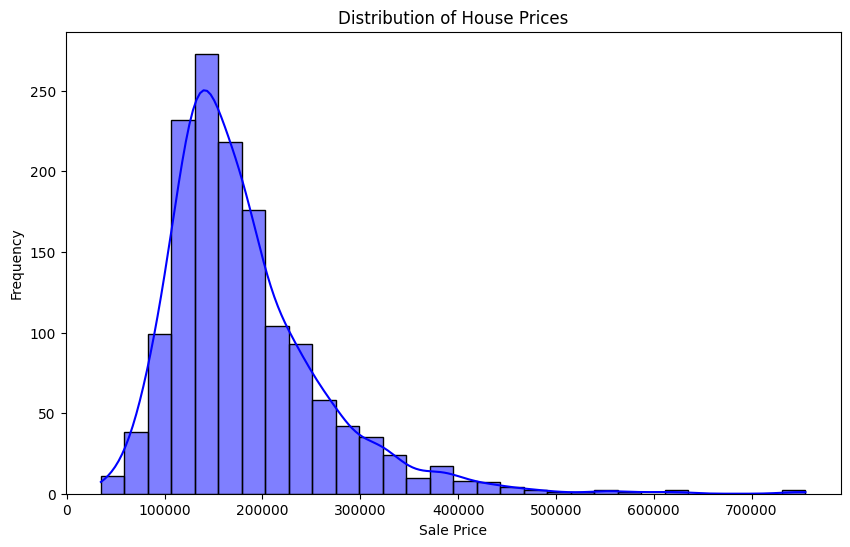

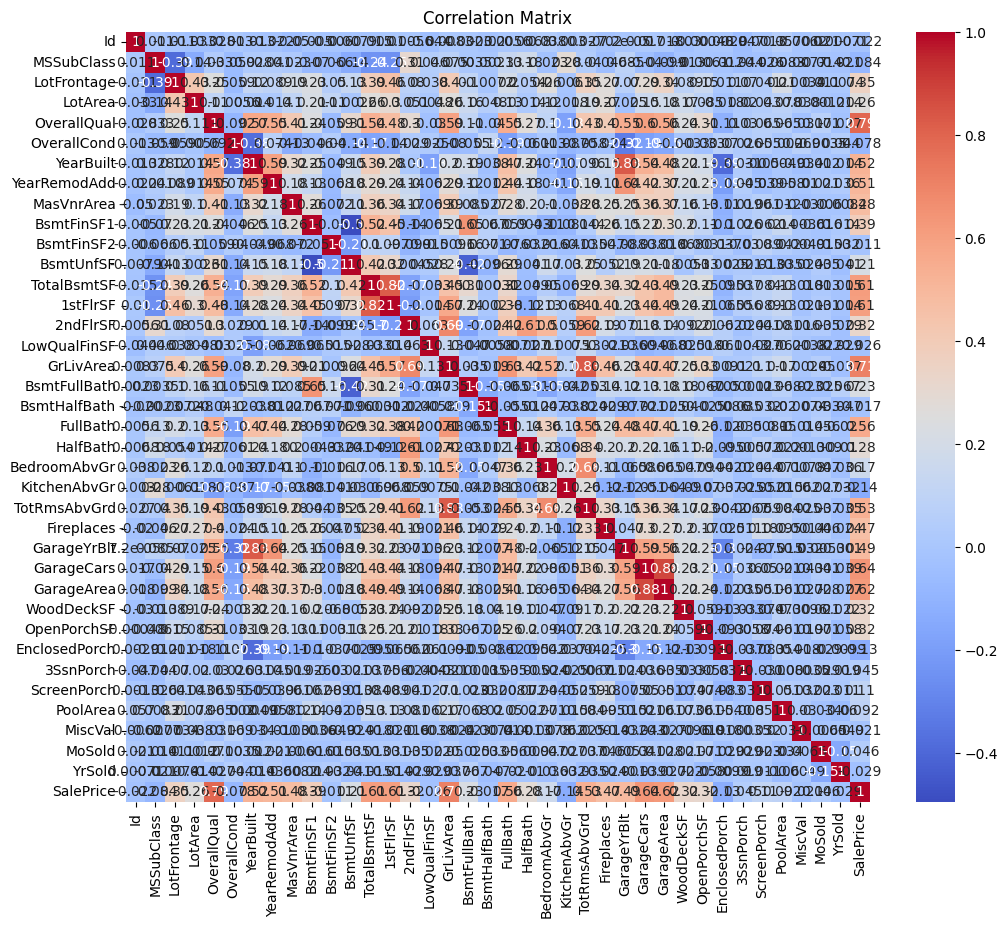

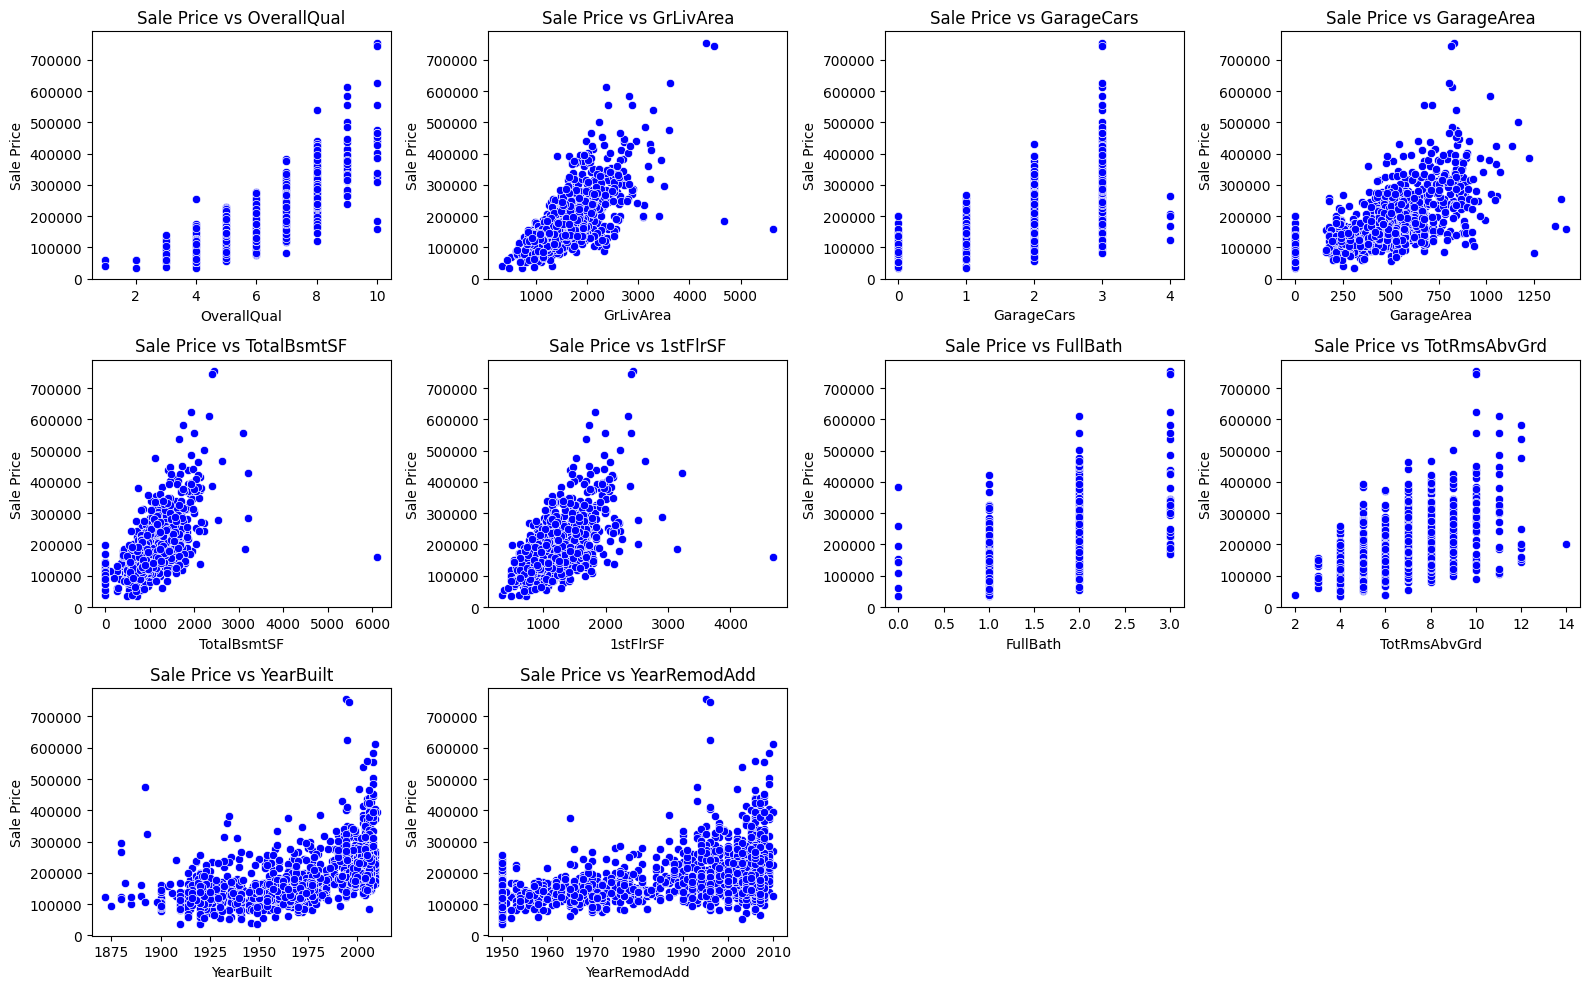

Mean Squared Error: 1558239575.1510913
Root Mean Squared Error: 39474.54338116011
Mean Absolute Error: 24774.219519604776
R-squared: 0.7968483304281094
PREDICTIONS FOR TEST SET
        Id  Predicted Sale Price
0     1461         110256.843790
1     1462         156469.882994
2     1463         169495.206846
3     1464         188446.349300
4     1465         218616.369307
...    ...                   ...
1454  2915          73711.026989
1455  2916          89501.083413
1456  2917         156694.781566
1457  2918         112680.452610
1458  2919         241276.988905

[1459 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the training data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Exploratory Data Analysis (EDA)
# Display basic information about the dataset
print(train_data.info())

# Check for missing values
print(train_data.isnull().sum())

# Handle missing values by imputation or removal
# For simplicity, let's drop columns with more than 50% missing values
missing_values = train_data.isnull().sum()
missing_columns = missing_values[missing_values > len(train_data)*0.5].index
train_data.drop(columns=missing_columns, inplace=True)

# Analyze the distribution of the target variable (house prices)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], bins=30, kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Explore relationships between features and the target variable
# For simplicity, let's select numerical features with high correlation with the target variable
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train_data[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Select features for the regression model
# Based on the correlation matrix and domain knowledge, choose features with high correlation with SalePrice
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

# Explore relationships between features and the target variable
# Scatter plots for selected features
plt.figure(figsize=(16, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=train_data[feature], y=train_data['SalePrice'], color='blue')
    plt.title(f'Sale Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

# Split data for training and testing
X = train_data[selected_features]
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Model Development
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


from sklearn.impute import SimpleImputer

# Fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
test_features_imputed = imputer.fit_transform(test_features)

# Predict Sale Prices using the trained model
predicted_prices = model.predict(test_features_imputed)

# Creating a DataFrame to display IDs and their predicted Sale Prices
predictions_df = pd.DataFrame({
    'Id': test_data['Id'],
    'Predicted Sale Price': predicted_prices
})

print("PREDICTIONS FOR TEST SET")
print(predictions_df)


The regression model forecasts house prices using a variety of factors, including overall quality, living area, garage capacity, basement size, basement size, first-floor area, complete bathrooms, total rooms above ground, year built, and year modified or added. Houses of higher overall quality are likely to command higher sale prices. Larger living rooms, garages, and basements may raise the value of a home. First-floor spaces are frequently sought after and can have a beneficial impact on sale prices. Full bathrooms attract buyers on the outside and may fetch greater costs. The year of construction and the year of remodeling can also influence sale values. These parameters were chosen for their strong connection with the target variable and relevance to house characteristics.

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [3]:
!pip install torch
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("movie_reviews_sentiment_Analysis.csv")

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")

# Tokenize the text data
tokenized_texts = df["Cleaned Review"].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=512))

# Perform sentiment analysis on each text
predictions = []
for tokenized_text in tokenized_texts:
    input_ids = torch.tensor(tokenized_text).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        outputs = model(input_ids)
    logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()
    predictions.append(predicted_label)

# Evaluate the performance
true_labels = df["Sentiment"].map({"Positive": 1, "Negative": 0}).tolist()
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.92
Precision: 0.92
Recall: 1.0
F1 Score: 0.9583333333333334


** Pretrained Language Model (PLM):**

 BERT is utilized for sentiment analysis. It was pretrained on a huge corpus of text from sources like as Wikipedia and BooksCorpus, with the Masked Language Model and Next Sentence Prediction goals. The model comprises 110 million variables, which are balanced between computing effectiveness and performance. It is adjusted for sequences tasks involving classification, notably sentiment analysis, with a classification layer replacing the model's last layer.

**ADVANTAGES:**

Contextual Understanding: BERT evaluates the entire
context of a word, including subtle subtleties and sentiment expressions.

Pre-trained on huge Sample: BERT has been trained on a huge corpus of text data, allowing it to learn sophisticated language representations.

Fine-tuning: BERT may be fine-tuned for specific tasks, such as sentiment analysis, by adding a classification layer.

Efficient Performance: BERT has demonstrated efficient performance in natural language processing tasks such as sentiment analysis.

**DISADVANTAGES**

• Large models need major computational resources for training and inference.

• Fine-tuning BERT for certain activities can be costly and time consuming.

• Large memory footprint complicates implementation in limited  resources situations.

• Interpretability is restricted due to the complicated decision-making process and complex representations.

**CHALLENGES**

• Resource significant: Modifying BERT on big datasets requires expensive hardware or cloud computing resources.

• Hyperparameter adjustment: Choosing optimal hyperparameters such as learning rate and batch size necessitates testing and adjustment.

• Data Preprocessing: Managing unique tokens, padding, and termination of BERT input.
